Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 217ms/step - loss: 0.0635 - val_loss: 0.1441
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0287 - val_loss: 0.0195
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0133 - val_loss: 0.0420
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0108 - val_loss: 0.0182
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0066 - val_loss: 0.0205
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0087 - val_loss: 0.0167
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0061 - val_loss: 0.0178
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0065 - val_loss: 0.0181
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0065 - val_loss: 0.0146
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0058 - val_loss: 0.0154
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0053 - val_loss: 0.0131
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0054 - val_loss: 0.0126

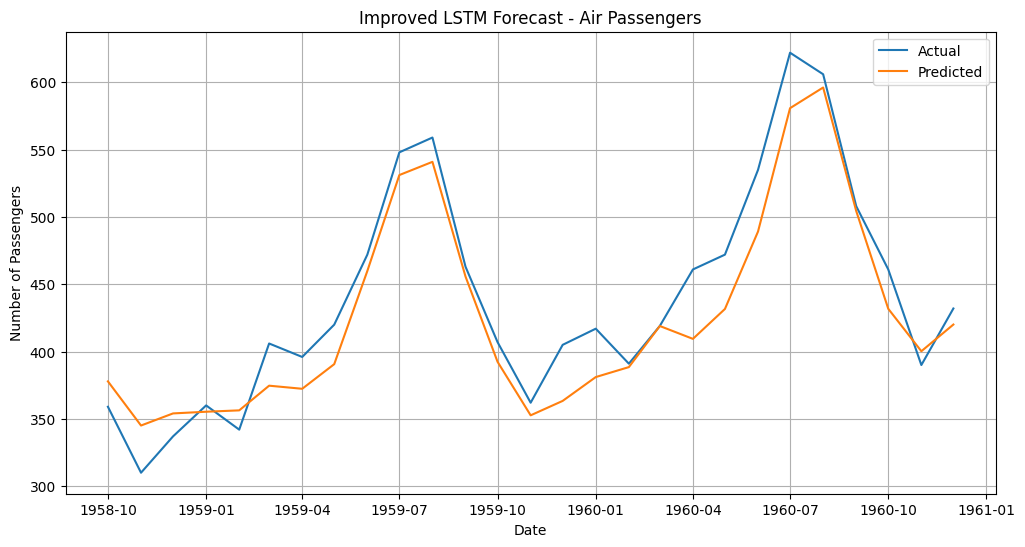

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

# Load and prepare data
df = pd.read_csv("/content/AirPassengers.csv")
df.columns = ['Month', 'Passengers']
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Normalize
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Passengers']])

# Sequence creation
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i])
        y.append(data[i])
    return np.array(x), np.array(y)

seq_length = 12
X, y = create_sequences(scaled_data, seq_length)

# Train-test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build improved model
model = Sequential([
    Bidirectional(LSTM(64, return_sequences=True), input_shape=(seq_length, 1)),
    Dropout(0.2),
    Bidirectional(LSTM(32)),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer=Adam(learning_rate=0.005), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Predict and inverse transform
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test):], y_test_inv, label='Actual')
plt.plot(df.index[-len(y_test):], y_pred_inv, label='Predicted')
plt.title('Improved LSTM Forecast - Air Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()
